### A Machine Learning Stock Trading Strategy 

This program uses machine learning to come up with a simple trading/investment strategy

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import datetime as dt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [5]:
# Download the data
end = '2024-05-24'
start = '2023-05-24'
df = yf.download('AAPL', start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-24,171.089996,172.419998,170.520004,171.839996,170.932220,45143500
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.076141,56058300
2023-05-26,173.320007,175.770004,173.110001,175.429993,174.503250,54835000
2023-05-30,176.960007,178.990005,176.570007,177.300003,176.363373,55964400
2023-05-31,177.330002,179.350006,176.759995,177.250000,176.313644,99625300
...,...,...,...,...,...,...
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400


In [7]:
# Create the independent variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [8]:
# Store the independent variables in a variable called 'X'
X = df[['Open-Close', 'High-Low', 'Close']]

# Show the first five rows of data
X.head()

,Open-Close,High-Low,Close
Date,,,
2023-05-24,-0.750000,1.899994,171.839996
2023-05-25,-0.580002,2.209991,172.990005
2023-05-26,-2.109985,2.660004,175.429993
2023-05-30,-0.339996,2.419998,177.300003
2023-05-31,0.080002,2.590012,177.250000


In [10]:
# Store the target variable into a variable called 'y'. 
#If tomorrow's close price is greater than today's close price, then put 1 else put 0
y = np.where(df.Close.shift(-1) >  df.Close, 1, 0)
# Show the data
y

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [11]:
# Get the percentage to split the data (90% training and 10% test data)
percentage_split = 0.9
row = int(df.shape[0] * percentage_split)

# Create the train dataset
X_train = X[:row]
y_train = y[:row]

# Create the test dataset
X_test = X[row:]
y_test = y[row:]

In [12]:
X_train

,Open-Close,High-Low,Close
Date,,,
2023-05-24,-0.750000,1.899994,171.839996
2023-05-25,-0.580002,2.209991,172.990005
2023-05-26,-2.109985,2.660004,175.429993
2023-05-30,-0.339996,2.419998,177.300003
2023-05-31,0.080002,2.590012,177.250000
...,...,...,...
2024-04-11,-6.699997,7.300003,175.039993
2024-04-12,-2.290009,4.149994,176.550003
2024-04-15,2.669998,4.130005,172.690002


In [13]:
X_test

,Open-Close,High-Low,Close
Date,,,
2024-04-18,0.990005,2.089996,167.039993
2024-04-19,1.210007,2.319992,165.000000
2024-04-22,-0.319992,2.489990,165.839996
2024-04-23,-1.549988,2.130005,166.899994
2024-04-24,-2.480011,3.089996,169.020004
2024-04-25,-0.360001,2.460007,169.889999
2024-04-26,0.580002,2.160004,169.300003
2024-04-29,-0.130005,2.929993,173.500000
2024-04-30,3.000000,4.990005,170.330002


In [14]:
# Import the library for the machine learning model called Support Vector Classifier (SVC)
from sklearn.svm import SVC

In [15]:
# Create the model
model = SVC()

# Train the model
model.fit(X_train[['Open-Close', 'High-Low']], y_train)

SVC()

In [16]:
# Check the score of the model on the train dataset
model.score(X_train[['Open-Close', 'High-Low']], y_train)

0.5530973451327433

In [17]:
# Check the score of the model on the test dataset
model.score(X_test[['Open-Close', 'High-Low']], y_test)

0.6538461538461539

In [18]:
# Make and show the model predictions
df['Predictions'] = model.predict(X[['Open-Close', 'High-Low']])
# Show the predictions
df['Predictions']

Date
2023-05-24    1
2023-05-25    1
2023-05-26    1
2023-05-30    1
2023-05-31    1
             ..
2024-05-17    1
2024-05-20    1
2024-05-21    1
2024-05-22    0
2024-05-23    0
Name: Predictions, Length: 252, dtype: int64

In [21]:
# Calculate the daily returns
df['Return'] = df['Close'].pct_change(1)
# Show the returns 
df['Return']

Date
2023-05-24         NaN
2023-05-25    0.006692
2023-05-26    0.014105
2023-05-30    0.010660
2023-05-31   -0.000282
                ...   
2024-05-17    0.000158
2024-05-20    0.006162
2024-05-21    0.006857
2024-05-22   -0.007538
2024-05-23   -0.021058
Name: Return, Length: 252, dtype: float64

In [20]:
# Calculate the strategy returns
df['Strat_Return'] = df['Predictions'].shift(1) * df['Return']
# Show the strategy returns
df['Strat_Return']

Date
2023-05-24         NaN
2023-05-25    0.006692
2023-05-26    0.014105
2023-05-30    0.010660
2023-05-31   -0.000282
                ...   
2024-05-17    0.000158
2024-05-20    0.006162
2024-05-21    0.006857
2024-05-22   -0.007538
2024-05-23   -0.000000
Name: Strat_Return, Length: 252, dtype: float64

In [22]:
# Calculate the Cumulative returns
df['Cumul_Ret'] = df['Return'].cumsum()
# Calculation of the strategy cumulative returns
df['Cumul_Strategy'] = df['Strat_Return'].cumsum()

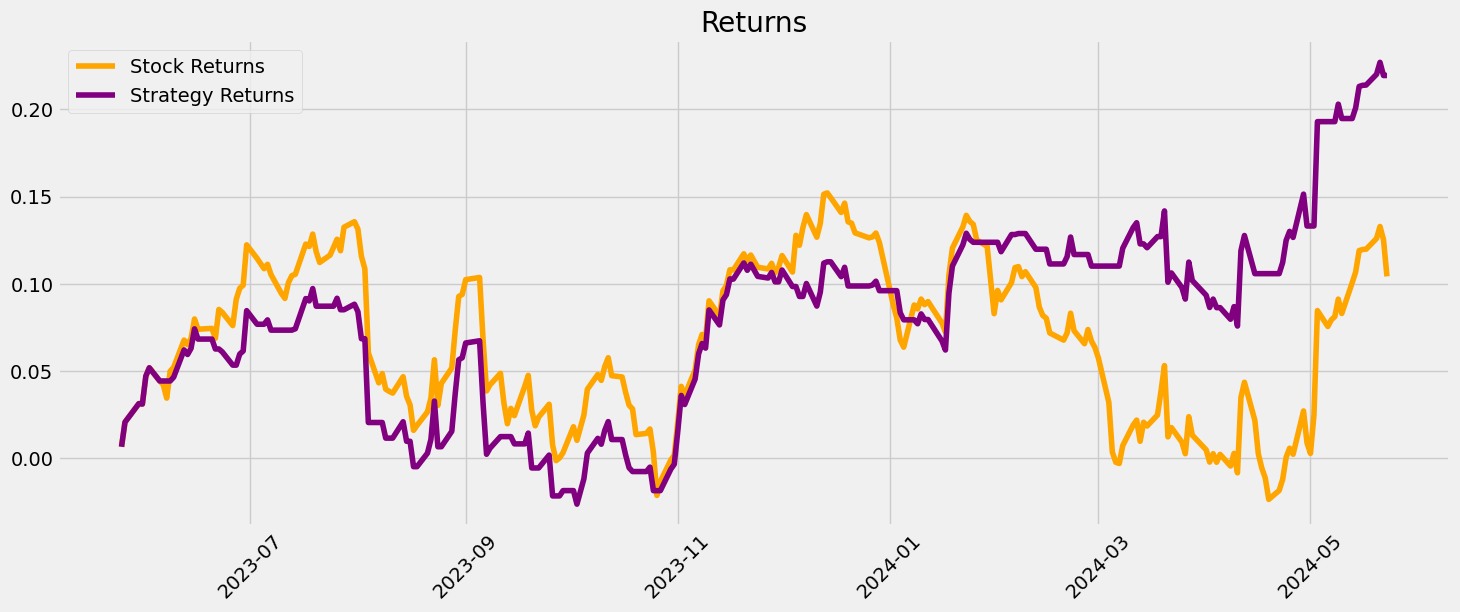

In [23]:
# Visualize and show the data
plt.figure(figsize=(16,6))
plt.title("Returns")
plt.plot(df['Cumul_Ret'], color='orange', label='Stock Returns')
plt.plot(df['Cumul_Strategy'], color='purple', label='Strategy Returns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [24]:
# Print the returns
print("The stock gives a return of ", df['Cumul_Ret'][-1]*100, "%")
print("The strategy gives a return of ", df['Cumul_Strategy'][-1]*100, "%")

The stock gives a return of  10.433578847300373 %
The strategy gives a return of  21.9477118314756 %
